In [85]:
!make install # Run command to install necessary modules
!make format
!make lint # Run a linter in Flake8

pip install -r requirements.txt
black scrapy/sayariproject/
All done! ✨ 🍰 ✨
7 files left unchanged.
flake8 --ignore=E121,E501,E265 scrapy/sayariproject/ ./webcrawling.ipynb


In [80]:
# Run the crawler
!make crawl

(cd scrapy && scrapy crawl firststop)
2024-09-12 08:46:50 [scrapy.utils.log] INFO: Scrapy 2.11.2 started (bot: sayariproject)
2024-09-12 08:46:50 [scrapy.utils.log] INFO: Versions: lxml 5.3.0.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.9.1, w3lib 2.2.1, Twisted 24.7.0, Python 3.12.5 | packaged by conda-forge | (main, Aug  8 2024, 18:32:50) [Clang 16.0.6 ], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.0, Platform macOS-14.1.1-arm64-arm-64bit
2024-09-12 08:46:50 [scrapy.addons] INFO: Enabled addons:
[]
2024-09-12 08:46:50 [asyncio] DEBUG: Using selector: KqueueSelector
2024-09-12 08:46:50 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2024-09-12 08:46:50 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2024-09-12 08:46:50 [scrapy.extensions.telnet] INFO: Telnet Password: f353b354d6573341
2024-09-12 08:46:50 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.cor

In [81]:
import json
with open('scrapy/output.json', 'r') as file:
    # Loads the JSON data from the file created from 'scrapy'
    companies_data = json.load(file)

companies_data

[{'Filing Type': 'Corporation - Business - Foreign',
  'Status': 'Active',
  'Standing - AR': 'Good',
  'Standing - RA': 'Good',
  'Standing - Other': 'Good',
  'Formed In': 'DELAWARE',
  'Term of Duration': 'Perpetual',
  'Initial Filing Date': '03/20/2014',
  'Principal Address': '1074 ARION CIRCLE, STE 116\nSAN ANTONIO, TX 78216',
  'Mailing Address': '1074 ARION CIR\nSTE 116\nSAN ANTONIO, TX 78216-3085',
  'AR Due Date': '05/15/2025',
  'Commercial Registered Agent': 'INCORP SERVICES, INC.\n4501 COLEMAN ST\nSTE 102\nBISMARCK, ND  58503',
  'Company': 'Xenex Disinfection Services Inc.'},
 {'Filing Type': 'Trade Name',
  'Status': 'Active',
  'Owner Name': 'XCS Pros, LLC',
  'Owner Address': '2407 32ND ST. S\nMR. MICHAEL BROOKS\nFARGO, ND 58103',
  'Nature of Business': 'Digital marketing, sales, content, management, and advertising services for business.',
  'Term of Duration': 'Expires - 5 years',
  'Initial Filing Date': '09/16/2022',
  'Expiration Date': '09/16/2027',
  'Principa

In [82]:
import networkx as nx
G = nx.Graph() # Person or Company that is an agent / owner

def create_graphs():
    """
    Creates the graphs, with two different types of nodes: company and person

    The edges are defined through defining relation between
    owner/agent and company
    """
    for data in companies_data:
        company_name = data["Company"]
        G.add_node(company_name, type="Company")
        if "Commercial Registered Agent" in data:
            cr_agent = data["Commercial Registered Agent"].split("\n")[0]
            G.add_node(cr_agent, type="Person")
            G.add_edges_from([(company_name, cr_agent),])
        if "Registered Agent" in data:
            r_agent = data["Registered Agent"].split("\n")[0]
            G.add_node(r_agent, type="Person")
            G.add_edges_from([(company_name, r_agent),])
        if "Owner Name" in data:
            owner = data["Owner Name"]
            G.add_node(owner, type="Person")
            G.add_edges_from([(company_name, owner),])
        elif "Owners" in data:
            owner_1 = data["Owners"].split("\n")[0]
            owner_2 = data[""].split("\n")[0]
            G.add_node(owner_1, type="Person")
            G.add_node(owner_2, type="Person")
            edges = [(owner_1, company_name), (owner_2, company_name),]
            G.add_edges_from(edges)

create_graphs()

In [51]:
# Set this to False if labels on graph are too distracting
graph_show_labels = True

/Users/icefreeze/miniconda3/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


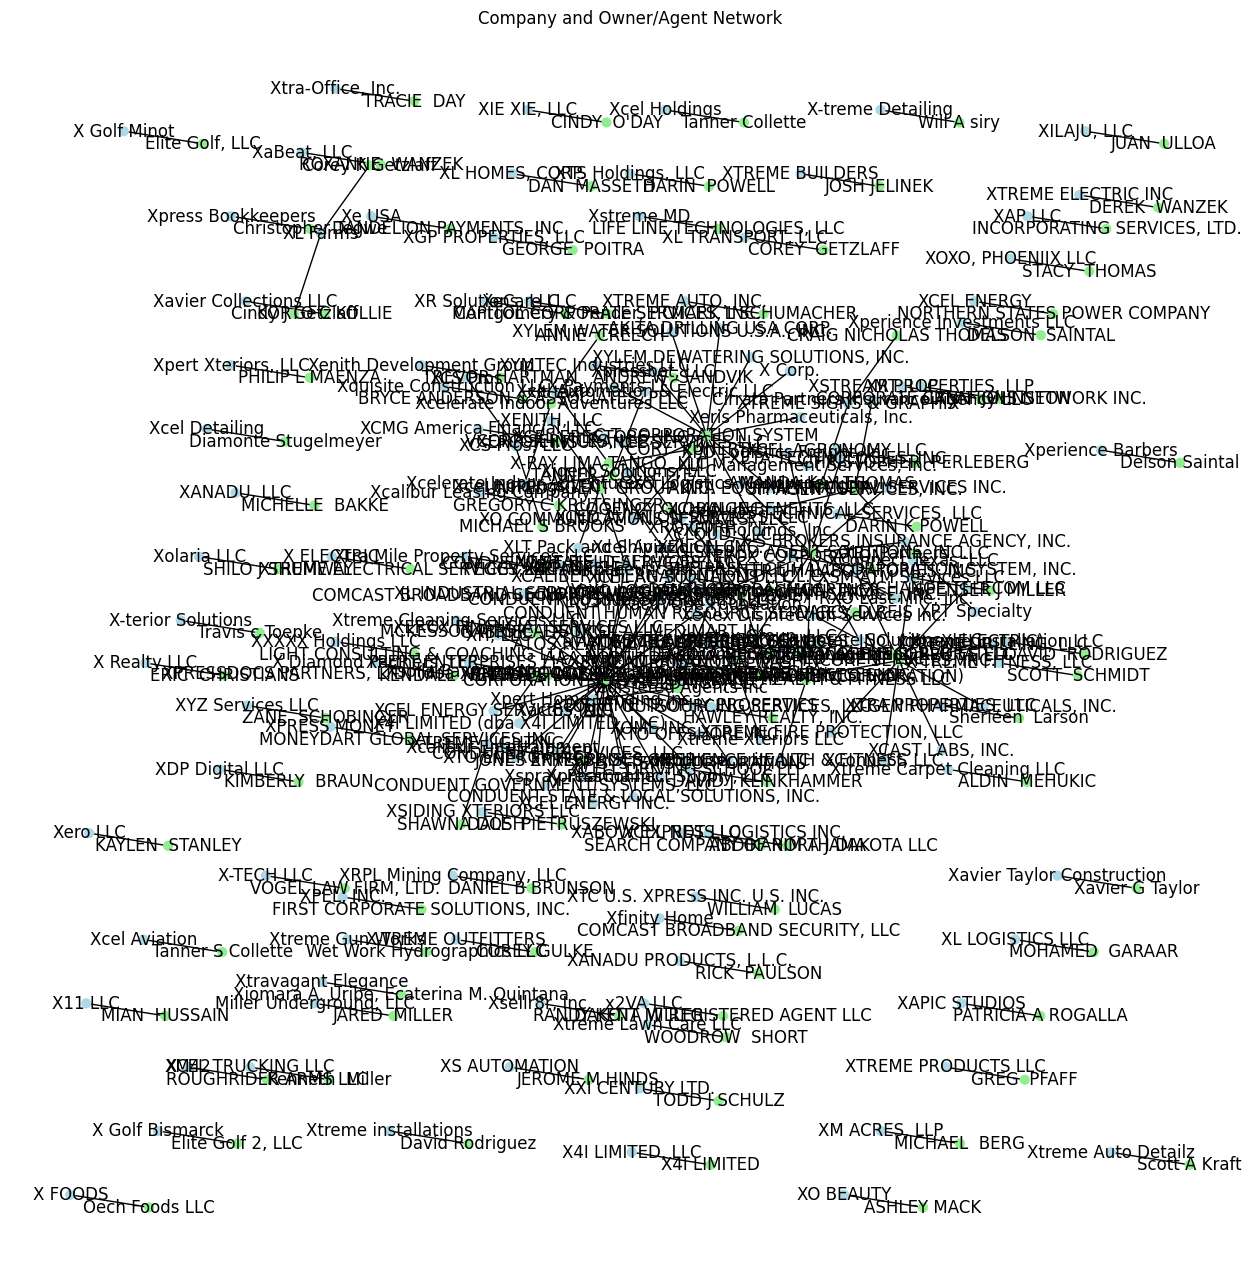

In [84]:
import matplotlib.pyplot as plt

def visualize_graph(type_colors):
    """
    Visualizes graphs representing relationship between owner/agent and companies
    """
    plt.figure(1, figsize=(16, 16))
    plt.title('Company and Owner/Agent Network')
    pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
    components = (G.subgraph(component) for component in nx.connected_components(G))
    for sub_graph in components:
        subgraph_colors = [type_colors[G.nodes[node]['type']] for node in sub_graph.nodes()]
        nx.draw(sub_graph, pos, node_size=40, node_color=subgraph_colors, vmin=0.0, vmax=1.0, with_labels=graph_show_labels)

colors = {'Company': 'lightblue', 'Person': 'lightgreen'}

visualize_graph(colors)

In [83]:
def print_connected_component_data():
    "Prints out connected component data"
    for component in nx.connected_components(G):
        print(G.subgraph(component).nodes(data=True))

print_connected_component_data()

[('Xenex Disinfection Services Inc.', {'type': 'Company'}), ('XTREME FIRE PROTECTION, LLC', {'type': 'Company'}), ('XCHANGE TELECOM LLC', {'type': 'Company'}), ('XConnect, LLC', {'type': 'Company'}), ('XTTRIUM LABORATORIES, INC.', {'type': 'Company'}), ('INCORP SERVICES, INC.', {'type': 'Person'}), ('XConnect Texas, LLC', {'type': 'Company'}), ('X-GEN PHARMACEUTICALS, INC.', {'type': 'Company'}), ('XCAST LABS, INC.', {'type': 'Company'}), ('XPONET (dba XPONET CORPORATION)', {'type': 'Company'}), ('XTREME DRILLING, LLC', {'type': 'Company'})]
[('XCS Pros', {'type': 'Company'}), ('MICHAEL S BROOKS', {'type': 'Person'}), ('XCS Pros, LLC', {'type': 'Company'})]
[('XCMG America Financial LLC', {'type': 'Company'}), ('VCORP SERVICES, LLC', {'type': 'Person'})]
[('RXO Last Mile, Inc.', {'type': 'Company'}), ('XCLOUD, LLC', {'type': 'Company'}), ('Xeratex Group, LLC', {'type': 'Company'}), ('XPO Logistics Freight, Inc.', {'type': 'Company'}), ('RXO Corporate Solutions, LLC', {'type': 'Company'